# Binary Classification: Horse or Human

## Data
* make sure of installing gdown" `pip install gdown`

In [1]:
!gdown https://drive.google.com/uc?id=1LBMr_jSJl8wbTQb5-JaxE0HO77BSkhLC -O /tmp/horse-or-human.zip

Downloading...
From: https://drive.google.com/uc?id=1LBMr_jSJl8wbTQb5-JaxE0HO77BSkhLC
To: /tmp/horse-or-human.zip
150MB [00:02, 62.4MB/s] 


In [2]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

Subfolder names indicate lables (or classes).
```
horse-or-human
├── horses
└── humans
```

In [3]:
folder_root = '/tmp/horse-or-human'
# Directory with our training horse pictures
train_horse_dir = os.path.join(folder_root, 'horses')

# Directory with our traning human pictures
train_human_dir = os.path.join(folder_root, 'humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse34-5.png', 'horse40-3.png', 'horse07-2.png', 'horse35-1.png', 'horse09-8.png', 'horse13-7.png', 'horse20-1.png', 'horse31-7.png', 'horse26-3.png', 'horse03-9.png']
['human10-17.png', 'human10-14.png', 'human08-12.png', 'human16-28.png', 'human05-19.png', 'human17-30.png', 'human06-04.png', 'human07-15.png', 'human02-00.png', 'human15-28.png']


In [5]:
print('total training horse images:', len(train_horse_names))
print('total training human images:', len(train_human_names))

total training horse images: 500
total training human images: 527


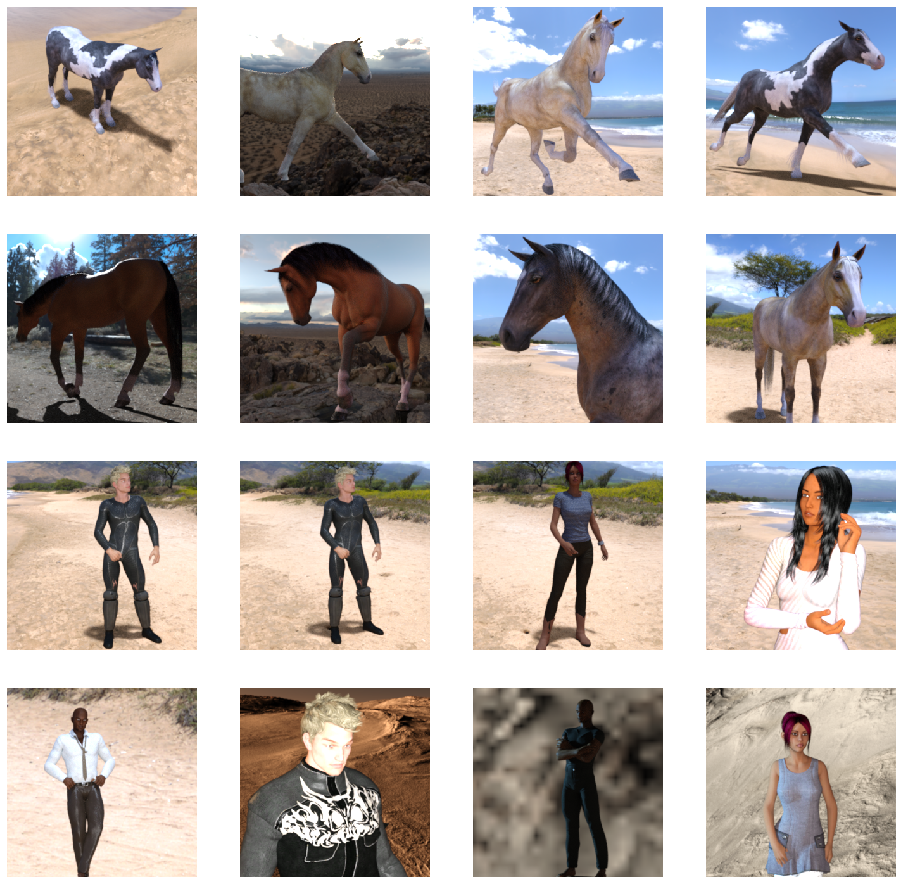

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                  for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                  for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

## Building a Small Model from Scratch
* input shape: (300, 300, 3)
* `sigmoid` activation for binary classification

In [7]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

**NOTE**: In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)
* https://en.wikipedia.org/wiki/Stochastic_gradient_descent

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', 
             optimizer=RMSprop(lr=0.001),
             metrics=['acc'])

### Data Processing
* ImageDataGenerator + (normalization)
* flow_from_directory + (class_mode, batch_size, target_size)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    folder_root,
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


### Training

In [12]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=8,
                             epochs=15,
                             verbose=2) 

Epoch 1/15
8/8 - 6s - loss: 1.1344 - acc: 0.5139
Epoch 2/15
8/8 - 5s - loss: 0.7984 - acc: 0.5818
Epoch 3/15
8/8 - 5s - loss: 0.8466 - acc: 0.6997
Epoch 4/15
8/8 - 5s - loss: 0.7247 - acc: 0.7664
Epoch 5/15
8/8 - 6s - loss: 0.4196 - acc: 0.8525
Epoch 6/15
8/8 - 4s - loss: 0.2689 - acc: 0.8915
Epoch 7/15
8/8 - 6s - loss: 0.0923 - acc: 0.9727
Epoch 8/15
8/8 - 5s - loss: 0.1157 - acc: 0.9535
Epoch 9/15
8/8 - 6s - loss: 0.3157 - acc: 0.9180
Epoch 10/15
8/8 - 5s - loss: 0.0820 - acc: 0.9655
Epoch 11/15
8/8 - 5s - loss: 0.0327 - acc: 0.9889
Epoch 12/15
8/8 - 5s - loss: 0.1437 - acc: 0.9422
Epoch 13/15
8/8 - 6s - loss: 0.2477 - acc: 0.9473
Epoch 14/15
8/8 - 5s - loss: 0.3147 - acc: 0.8953
Epoch 15/15
8/8 - 6s - loss: 0.0240 - acc: 0.9912


### Running the Model

In [13]:
import numpy as np
import random
from keras.preprocessing import image #img_to_array, load_img

Using TensorFlow backend.


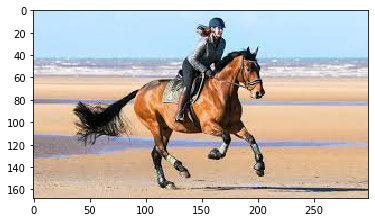

(1, 300, 300, 3)
predicted as human with certainty of  1.0


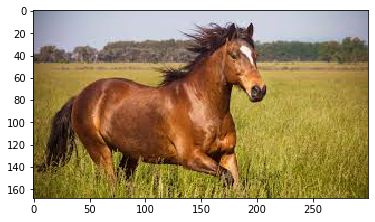

(1, 300, 300, 3)
preducted as horse with certainty of  1.0


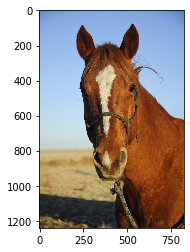

(1, 300, 300, 3)
preducted as horse with certainty of  1.0


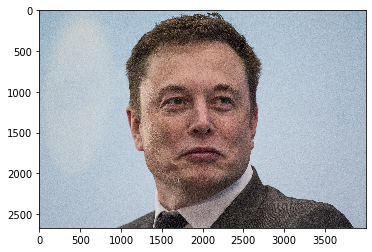

(1, 300, 300, 3)
predicted as human with certainty of  1.0


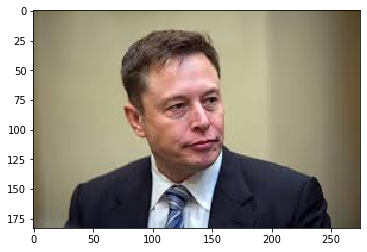

(1, 300, 300, 3)
preducted as horse with certainty of  0.999999907200575


In [14]:
# load test images
test_images = ['test_horse.jpeg', 'test_horse_human.jpeg', 'test_horse_head.jpg', 'test_elon_musk.jpg', 'test_elon_musk1.jpeg']

for test_image in test_images:
    img = image.load_img(test_image)
    plt.imshow(img)
    plt.show()
    img = image.load_img(test_image, target_size=(300,300)) # PIL image
    x = image.img_to_array(img) # Numpy: (300, 300, 3)
    x = np.expand_dims(x, axis=0) # 
    print(x.shape)
    prob = np.squeeze(model.predict(x))
    if prob > 0.5:
        print("predicted as human with certainty of ", prob)
    else:
        print("preducted as horse with certainty of ", 1- prob)

### Visualizing Intermediate Representations

In [15]:
layer_outputs = [layer.output for layer in model.layers]
for layer_output in layer_outputs[:10]:
    print(layer_output.name)

conv2d/Identity:0
max_pooling2d/Identity:0
conv2d_1/Identity:0
max_pooling2d_1/Identity:0
conv2d_2/Identity:0
max_pooling2d_2/Identity:0
conv2d_3/Identity:0
max_pooling2d_3/Identity:0
conv2d_4/Identity:0
max_pooling2d_4/Identity:0


In [16]:
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs[:10])

In [17]:
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
print(img_path)

/tmp/horse-or-human/horses/horse25-4.png


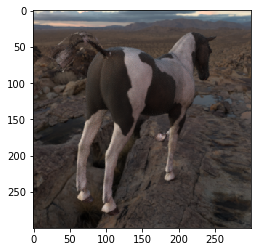

In [19]:
img = image.load_img(img_path, target_size=(300,300))
plt.imshow(img)

In [21]:
x = image.img_to_array(img) # (300, 300, 3)
x = x.reshape((1,) + x.shape) # (1, 300, 300, 3)
x /= 255.0

In [22]:
layer_output_maps = visualization_model.predict(x)
for i, layer_output_map in enumerate(layer_output_maps):
    print("{}: {}".format(i, layer_output_map.shape))

0: (1, 298, 298, 16)
1: (1, 149, 149, 16)
2: (1, 147, 147, 32)
3: (1, 73, 73, 32)
4: (1, 71, 71, 64)
5: (1, 35, 35, 64)
6: (1, 33, 33, 64)
7: (1, 16, 16, 64)
8: (1, 14, 14, 64)
9: (1, 7, 7, 64)


/home/kbu/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


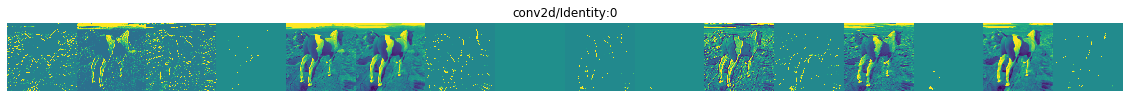

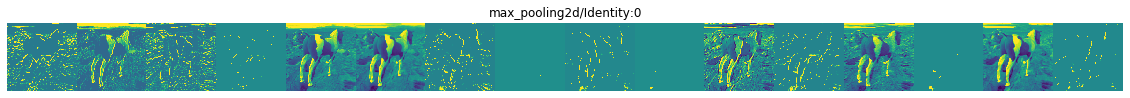

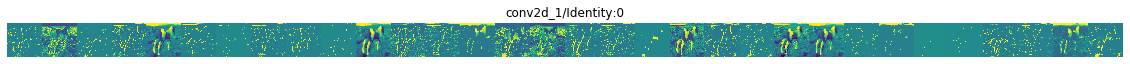

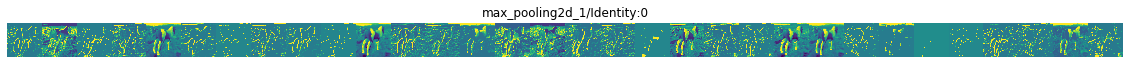

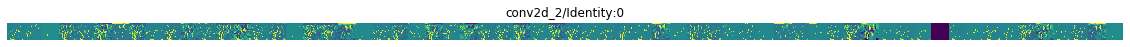

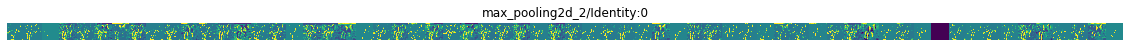

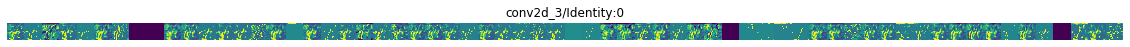

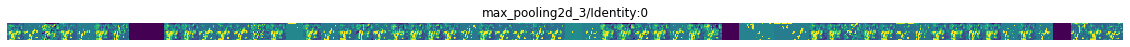

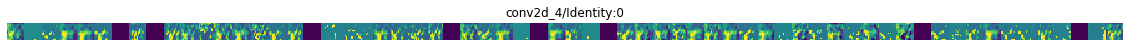

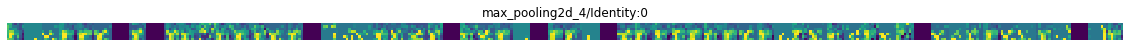

In [23]:
layer_names = [layer.name for layer in layer_outputs[:10]]
for layer_name, feature_map in zip(layer_names, layer_output_maps):
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
        x = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std()
        x *=64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size : (i+1) * size] = x
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.axis('off')
    plt.imshow(display_grid, aspect='auto', cmap='viridis')